In [1]:
import pandas as pd 
import numpy as np


# NLTK is our Natural-Language-Took-Kit
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Import our text vectorizers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Libraries for helping us with strings
import string
# Regular Expression Library
import re

# Import classifiers
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

# metrics contain our plot_confustion_matrix and classification_report
from sklearn import metrics

# Helper fuction to splitting data
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix 

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\samue\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\samue\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\samue\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df = pd.read_csv('DATA\music_data.csv')
df.head()

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.0
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,...,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.0
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,...,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.0
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,...,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.0
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,...,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.0


In [3]:
df.isnull().sum()
df.describe()

,Unnamed: 0,release_date,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,...,like/girls,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,age
count,28372.000000,28372.000000,28372.000000,28372.000000,28372.000000,28372.000000,28372.000000,28372.000000,28372.000000,28372.000000,...,28372.000000,28372.000000,28372.000000,28372.000000,28372.000000,2.837200e+04,28372.000000,28372.000000,28372.000000,28372.000000
mean,42946.323558,1990.236888,73.028444,0.021112,0.118396,0.120973,0.057387,0.017422,0.017045,0.048681,...,0.028057,0.129389,0.030996,0.533348,0.665249,3.392347e-01,0.080049,0.532864,0.569875,0.425187
std,24749.325492,18.487463,41.829831,0.052370,0.178684,0.172200,0.111923,0.040670,0.041966,0.106095,...,0.058473,0.181143,0.071652,0.173218,0.108434,3.267143e-01,0.211245,0.250972,0.244385,0.264107
min,0.000000,1950.000000,1.000000,0.000291,0.000284,0.000291,0.000289,0.000284,0.000289,0.000284,...,0.000284,0.000284,0.000289,0.005415,0.000000,2.811248e-07,0.000000,0.000000,0.000000,0.014286
25%,20391.250000,1975.000000,42.000000,0.000923,0.001120,0.001170,0.001032,0.000993,0.000923,0.000975,...,0.000975,0.001144,0.000993,0.412975,0.595364,3.423598e-02,0.000000,0.329143,0.380361,0.185714
50%,45405.500000,1991.000000,63.000000,0.001462,0.002506,0.006579,0.001949,0.001595,0.001504,0.001754,...,0.001595,0.005263,0.001754,0.538612,0.679050,2.259028e-01,0.000085,0.539365,0.580567,0.414286
75%,64090.500000,2007.000000,93.000000,0.004049,0.192608,0.197793,0.065842,0.010002,0.004785,0.042301,...,0.026622,0.235113,0.032622,0.656666,0.749026,6.325298e-01,0.009335,0.738252,0.772766,0.642857
max,82451.000000,2019.000000,199.000000,0.647706,0.981781,0.962105,0.973684,0.497463,0.545303,0.940789,...,0.594459,0.981424,0.958810,0.993502,1.000000,1.000000e+00,0.996964,1.000000,1.000000,1.000000


C:\Users\samue\anaconda3\lib\site-packages\seaborn\axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


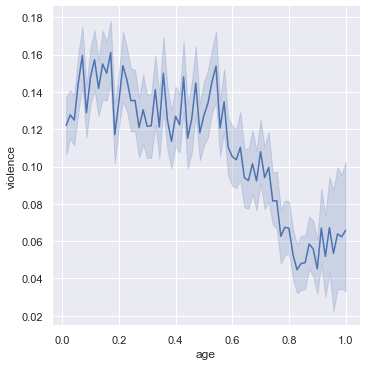

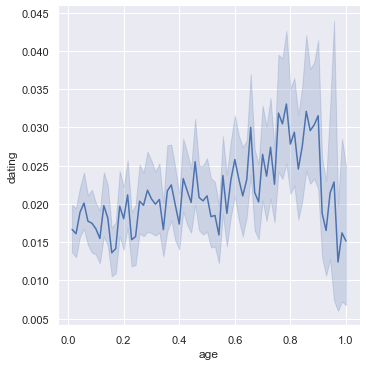

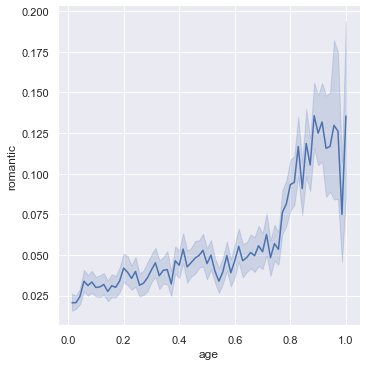

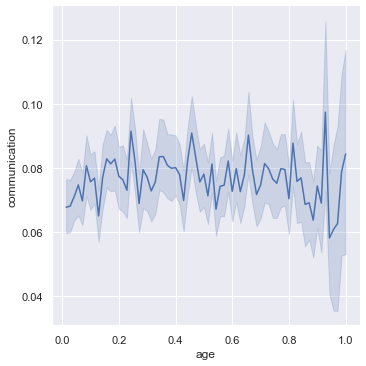

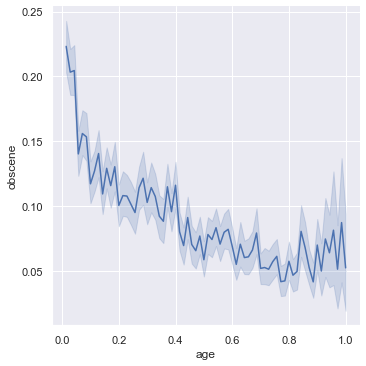

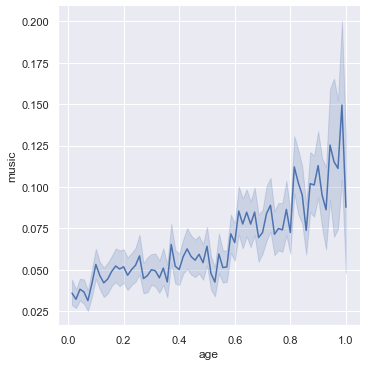

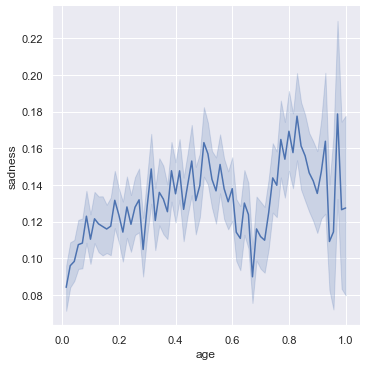

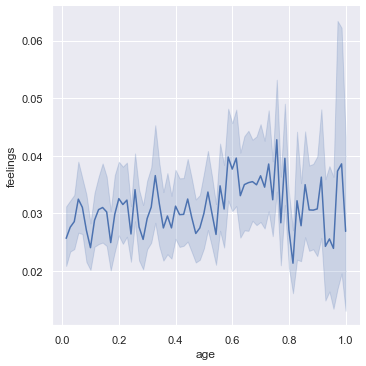

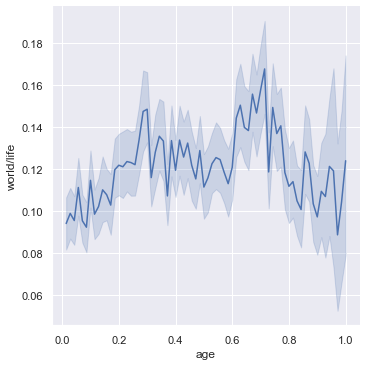

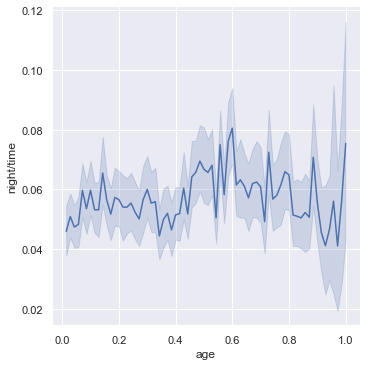

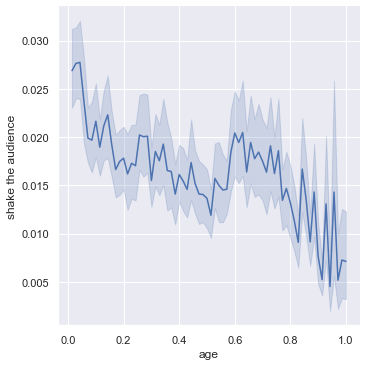

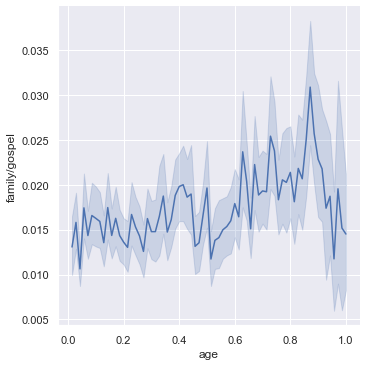

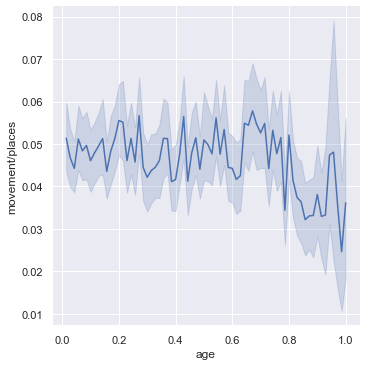

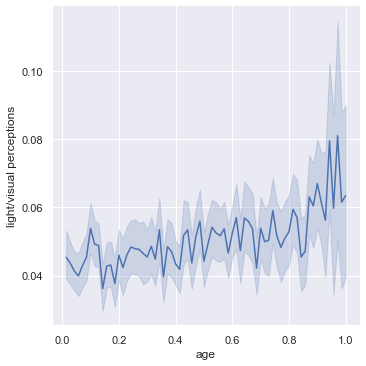

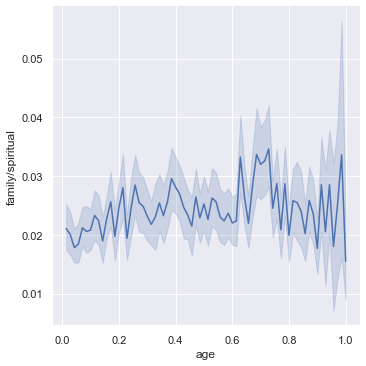

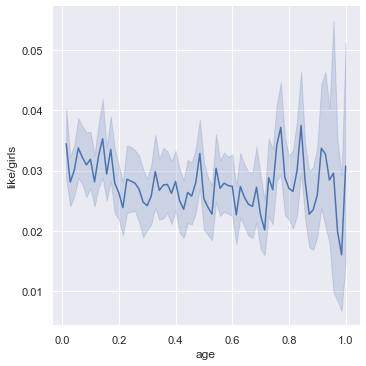

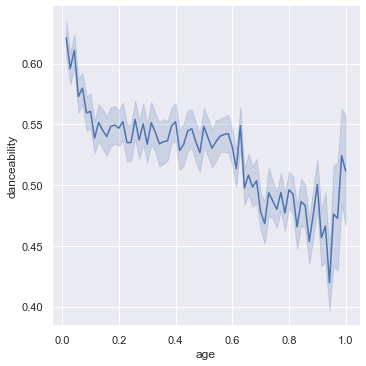

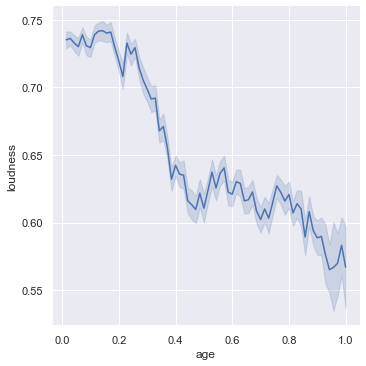

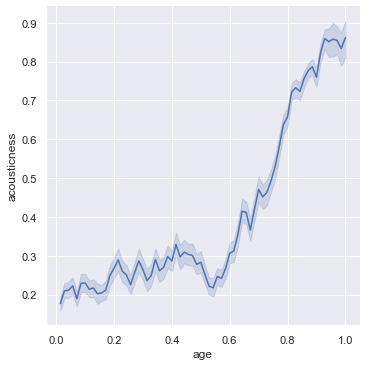

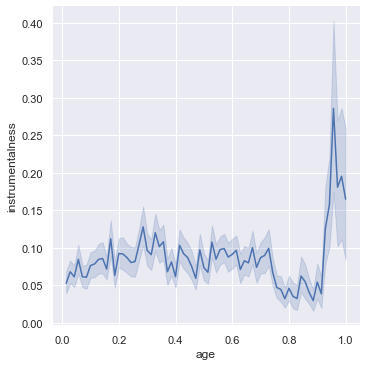

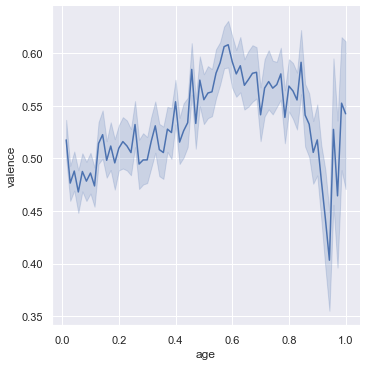

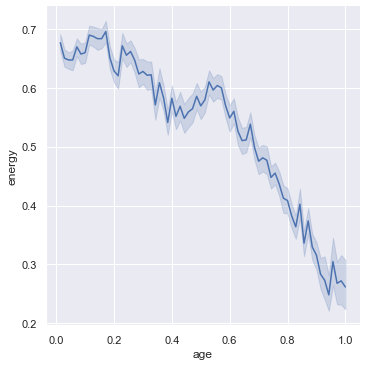

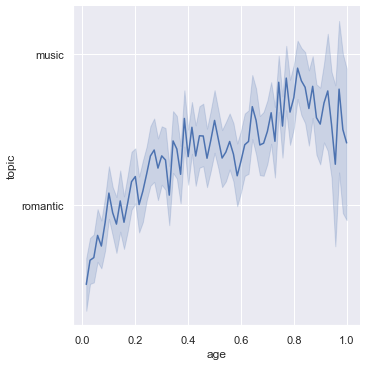

In [6]:
all_features = ['violence', 'dating', 'romantic', 'communication', 'obscene', 'music', 'sadness', 'feelings',
               'world/life', 'night/time', 'shake the audience', 'family/gospel', 'movement/places', 'light/visual perceptions',
               'family/spiritual', 'like/girls', 'danceability', 'loudness', 'acousticness', 'instrumentalness',
               'valence', 'energy', 'topic']
for feature in all_features:
    sns.relplot(data = df, y = feature, x = 'age', kind = 'line', height = 5, aspect = 1)

In [7]:
def make_lower(a_string):
    return a_string.lower()

def remove_punctuation(a_string):    
    a_string = re.sub(r'[^\w\s]','',a_string)
    return a_string

def stem_words(a_string):
    # Initalize our Stemmer
    porter = PorterStemmer()
    
    # Break the sentence down into a list of words
    words = word_tokenize(a_string)
    
    # Make a list to append valid words into
    valid_words = []

    # Loop through all the words
    for word in words:
        # Stem the word
        stemmed_word = porter.stem(word)
        
        # Append stemmed word to our valid_words
        valid_words.append(stemmed_word)
        
    # Join the list of words together into a string
    a_string = ' '.join(valid_words)

    return a_string 

def text_pipeline(input_string):
    input_string = make_lower(input_string)
    input_string = remove_punctuation(input_string)    
    return input_string
df['message_clean'] = df['lyrics']
df['message_clean'] = df['lyrics'].apply(text_pipeline)

In [8]:
X = df['message_clean'].values
y = df['genre'].values

In [9]:
c1 = df['message_clean'].str.contains('hold')
c3 = df['message_clean'].str.contains('time')
c2 = df['artist_name']
df['Checker'] =  np.where( c1 & c3, 1, 0 )
select_statement = df['Checker'] == 1
df[ select_statement ]

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age,message_clean,Checker
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.000000,hold time feel break feel untrue convince spea...,1
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,...,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.000000,till darling till matter know till dream live ...,1
46,126,los hermanos arriagada,poema,1954,pop,night mind deep dream till time look eye touch...,55,0.057994,0.000940,0.355957,...,0.547276,0.508371,0.738956,0.000000,0.749588,0.314293,sadness,0.942857,night mind deep dream till time look eye touch...,1
63,185,ted heath,to you my love,1955,pop,long finish patrol light burn distance dare so...,135,0.000566,0.321891,0.000566,...,0.579768,0.501449,0.939759,0.000001,0.668178,0.295273,violence,0.928571,long finish patrol light burn distance dare so...,1
79,244,harry belafonte,i do adore her,1956,pop,shadow fall star appear pain feel relive faith...,78,0.001224,0.001224,0.162519,...,0.666414,0.560136,0.973896,0.000000,0.861913,0.289267,sadness,0.914286,shadow fall star appear pain feel relive faith...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28294,82349,tyron blackshit,bunny hop,2019,hip hop,time somebody life line start slip years go bi...,85,0.000907,0.082185,0.099456,...,0.855951,0.673564,0.050702,0.000000,0.510511,0.492477,obscene,0.014286,time somebody life line start slip years go bi...,1
28299,82354,flipmode squad,this is what happens,2019,hip hop,nigga digga rampage word street flipmode arise...,110,0.000774,0.000774,0.000774,...,0.727066,0.809810,0.082730,0.000129,0.672300,0.827822,obscene,0.014286,nigga digga rampage word street flipmode arise...,1
28311,82369,rakim,it's the r,2019,hip hop,lowkey need host brand know flow cause swerve ...,176,0.033931,0.000543,0.000543,...,0.811546,0.669051,0.150602,0.000000,0.845425,0.582570,obscene,0.014286,lowkey need host brand know flow cause swerve ...,1
28313,82371,denzel curry,equalizer,2019,hip hop,ultimate equalizer synthesizer ultimately brut...,149,0.000658,0.145060,0.000658,...,0.757392,0.771325,0.003523,0.002176,0.350783,0.537523,obscene,0.014286,ultimate equalizer synthesizer ultimately brut...,1


In [10]:
df1 = df[['artist_name','track_name','genre','message_clean']]

df1.head()

,artist_name,track_name,genre,message_clean
0,mukesh,mohabbat bhi jhoothi,pop,hold time feel break feel untrue convince spea...
1,frankie laine,i believe,pop,believe drop rain fall grow believe darkest ni...
2,johnnie ray,cry,pop,sweetheart send letter goodbye secret feel bet...
3,pérez prado,patricia,pop,kiss lips want stroll charm mambo chacha merin...
4,giorgos papadopoulos,apopse eida oneiro,pop,till darling till matter know till dream live ...


In [11]:
def filterFunction(df,word1,word2):
    w1 = df['message_clean'].str.contains(word1)
    w2 = df['message_clean'].str.contains(word2)
    df['checker'] = np.where(w1&w2, 1,0)
    select_statement = df['checker']==1
    print(df[select_statement])

    
filterFunction(df1,'rap','tonight')

          artist_name                                track_name    genre  \
43        asha bhosle            mere hamsafar tujhe kya khabar      pop   
895    wilson pickett                       teardrops will fall      pop   
1374      classics iv                                    traces      pop   
1783     procol harum                               grand hotel      pop   
1967        joan baez                        fountain of sorrow      pop   
...               ...                                       ...      ...   
27899        styles p  rude boy hip hop (feat. raheem devaughn)  hip hop   
27973         mack 10                                  so sharp  hip hop   
28018           ice-t           new jack hustler (nino's theme)  hip hop   
28201     lloyd banks                                i get high  hip hop   
28234        ms. jade                               ching ching  hip hop   

                                           message_clean  checker  
43     hold close t

<ipython-input-11-8e160bd4ba20>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['checker'] = np.where(w1&w2, 1,0)


In [12]:
NewOutcome = df1[df1['checker']==1]
NewOutcome.head(100)

,artist_name,track_name,genre,message_clean,checker
43,asha bhosle,mere hamsafar tujhe kya khabar,pop,hold close tonight hear doubt alright felt spe...,1
895,wilson pickett,teardrops will fall,pop,teardrops fall tonight teardrops fall read let...,1
1374,classics iv,traces,pop,fade photograph cover line crease ticket tear ...,1
1783,procol harum,grand hotel,pop,tonight sleep silken sheet drink fine wine rar...,1
1967,joan baez,fountain of sorrow,pop,look photograph inside drawer take photograph ...,1
...,...,...,...,...,...
27899,styles p,rude boy hip hop (feat. raheem devaughn),hip hop,ghost spree like rappers cover tonight light s...,1
27973,mack 10,so sharp,hip hop,stay sharp yeah sharp mean know money grow sta...,1
28018,ice-t,new jack hustler (nino's theme),hip hop,hustler word pull trigger long grit teeth spra...,1
28201,lloyd banks,i get high,hip hop,know suppose smoke bouncer motherfuckin hand h...,1


In [13]:
NewOutcome.isnull().sum()

artist_name      0
track_name       0
genre            0
message_clean    0
checker          0
dtype: int64

In [14]:
NewOutcome = pd.get_dummies(NewOutcome,columns=['checker'],drop_first=False)
NewOutcome.head()

,artist_name,track_name,genre,message_clean,checker_1
43,asha bhosle,mere hamsafar tujhe kya khabar,pop,hold close tonight hear doubt alright felt spe...,1
895,wilson pickett,teardrops will fall,pop,teardrops fall tonight teardrops fall read let...,1
1374,classics iv,traces,pop,fade photograph cover line crease ticket tear ...,1
1783,procol harum,grand hotel,pop,tonight sleep silken sheet drink fine wine rar...,1
1967,joan baez,fountain of sorrow,pop,look photograph inside drawer take photograph ...,1
